<a href="https://colab.research.google.com/github/ricardoruedas/ML/blob/main/%5B02%5D%20-%20Modelos%20Supervisados%20Lineales/Supervisados_Lineales_Ejercicio_4_regresion_logistica_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervisados Lineales - Ejercicio 4: regresion_logistica_diabetes.ipynb

En este ejercicio entrenaremos un modelo de **Regresión Logística** utilizando el dataset de Diabetes de `scikit-learn`. Convertiremos la variable objetivo a binaria para plantear un problema de clasificación, evaluaremos el rendimiento con métricas adecuadas y analizaremos la interpretabilidad de los coeficientes.

### Objetivos
- Cargar el dataset de Diabetes desde `scikit-learn`.
- Formular un problema de clasificación binaria a partir del objetivo continuo.
- Entrenar una **Regresión Logística** con y sin estandarización.
- Evaluar el modelo con Accuracy, Matriz de confusión, ROC-AUC.
- Interpretar coeficientes como odds ratios.

### Descripción del dataset
El dataset de Diabetes contiene 442 pacientes y 10 características numéricas normalizadas (edad, sexo, IMC, presión sanguínea y 6 medidas bioquímicas). El objetivo original es continuo y representa la progresión de la enfermedad tras un año. Para clasificación, lo binarizaremos.

### 1. Importación de librerías y carga del dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
sns.set(style='whitegrid')

In [2]:
# Cargar dataset de Diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_cont = pd.Series(data.target, name='progression')

# Convertimos a clasificación binaria: 1 si progresión > mediana, 0 en caso contrario
threshold = y_cont.median()
y = (y_cont > threshold).astype(int)
print('Umbral de binarización (mediana):', threshold)
X.head()

Umbral de binarización (mediana): 140.5


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

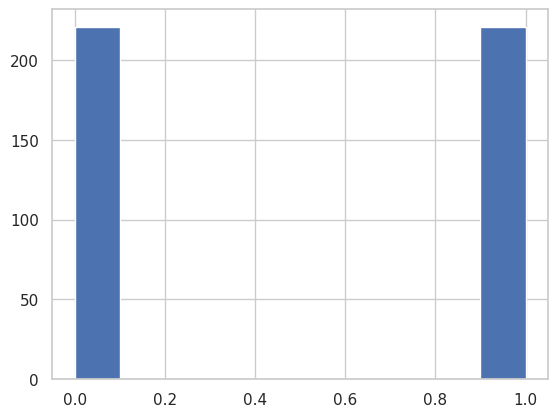

In [8]:
y.hist()

### 2. División de datos

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((353, 10),
 (89, 10),
 np.float64(0.5014164305949008),
 np.float64(0.4943820224719101))

### 4. Estandarización y entrenamiento

In [5]:
# Estandarizamos todas las columnas numéricas
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [6]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = logreg.predict(X_test_std)
y_proba = logreg.predict_proba(X_test_std)[:, 1]

In [15]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1])

In [16]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy (std):', acc)
print('ROC-AUC (std):', auc)

Accuracy (std): 0.7415730337078652
ROC-AUC (std): 0.8262626262626263


### 5. Matriz de confusión y clasificación

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Real 0','Real 1'], columns=['Pred 0','Pred 1'])
print(cm_df)
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred, digits=3))

        Pred 0  Pred 1
Real 0      31      14
Real 1       9      35

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.775     0.689     0.729        45
           1      0.714     0.795     0.753        44

    accuracy                          0.742        89
   macro avg      0.745     0.742     0.741        89
weighted avg      0.745     0.742     0.741        89



### 6. Curva ROC

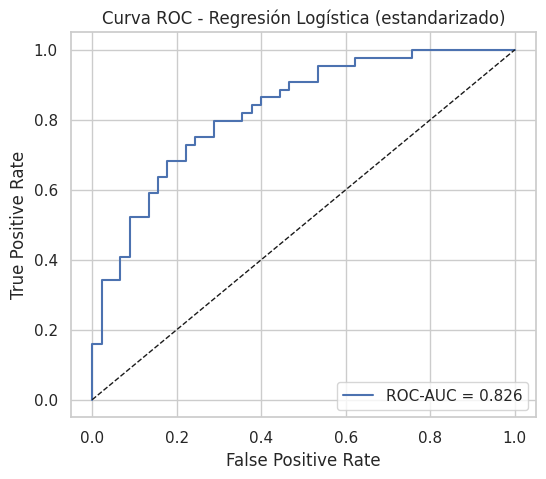

In [18]:
fpr, tpr, thr = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC-AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística (estandarizado)')
plt.legend(loc='lower right')
plt.show()

### 7. Interpretación de coeficientes

Cada variable aporta un "empuje" al resultado: positivo = aumenta probabilidad, negativo = reduce.

El odds_ratio nos dice cuánto multiplican ( >1 ) o dividen ( <1 ) las probabilidades de que ocurra el evento.


In [19]:
# Coeficientes en escala estandarizada -> interpretables como efecto por desviación estándar
coef = pd.Series(logreg.coef_[0], index=X.columns, name='coef')
odds_ratio = np.exp(coef)
summary = pd.concat([coef, odds_ratio.rename('odds_ratio')], axis=1).sort_values('odds_ratio', ascending=False)
summary

,coef,odds_ratio
s5,0.863100,2.370498
bmi,0.737994,2.091736
bp,0.719217,2.052824
s2,0.178080,1.194920
age,0.069721,1.072209
s4,-0.019727,0.980466
s6,-0.110004,0.895831
s3,-0.415655,0.659908
sex,-0.485845,0.615177
s1,-0.546749,0.578828


### Conclusión
Hemos formulado un problema de clasificación a partir del objetivo continuo del dataset de Diabetes, entrenado una Regresión Logística con y sin estandarización, evaluado su rendimiento con métricas adecuadas y analizado la contribución de cada variable mediante coeficientes y odds ratios.